# Australian Tourist Motive Segmentation using KMeans Clustering

## Step 1: Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Step 2: Load Dataset

In [3]:
df = pd.read_csv("Dataset/vacation_complete_dataset.csv")
df.head()

,Gender,Age,Education,Income,Income2,Occupation,State,Relationship.Status,Obligation,Obligation2,...,entertainment facilities,not care about prices,life style of the local people,intense experience of nature,cosiness/familiar atmosphere,maintain unspoilt surroundings,everything organised,unspoilt nature/natural landscape,cultural offers,change of surroundings
0,Female,25,6.0,"$30,001 to $60,000",30-60k,Clerical or service worker,VIC,single,4.800000,Q4,...,no,no,no,no,no,no,no,no,no,no
1,Female,31,8.0,"$120,001 to $150,000",>120k,professional,WA,married,3.300000,Q1,...,no,no,yes,no,no,no,no,no,no,yes
2,Male,21,3.0,"$90,001 to $120,000",90-120k,NaN,NSW,single,3.400000,Q2,...,no,yes,yes,no,yes,no,no,no,yes,no
3,Female,18,2.0,"$30,001 to $60,000",30-60k,unemployed,NSW,single,2.633333,Q1,...,yes,no,no,yes,no,no,no,no,no,yes
4,Male,61,3.0,"Less than $30,000",<30k,retired,WA,married,3.400000,Q2,...,no,no,yes,no,no,yes,no,no,no,no


## Step 3: Explore Data

In [4]:
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values per column:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

Shape of dataset: (1000, 32)

Columns: ['Gender', 'Age', 'Education', 'Income', 'Income2', 'Occupation', 'State', 'Relationship.Status', 'Obligation', 'Obligation2', 'NEP', 'Vacation.Behaviour', 'rest and relax', 'luxury / be spoilt', 'do sports', 'excitement, a challenge', 'not exceed planned budget', 'realise creativity', 'fun and entertainment', 'good company', 'health and beauty', 'free-and-easy-going', 'entertainment facilities', 'not care about prices', 'life style of the local people', 'intense experience of nature', 'cosiness/familiar atmosphere', 'maintain unspoilt surroundings', 'everything organised', 'unspoilt nature/natural landscape', 'cultural offers', 'change of surroundings']

Missing values per column:
 Gender                                0
Age                                   0
Education                             8
Income                               66
Income2                              66
Occupation                           59
State                        

## Step 4: Select Travel Motive Columns (yes/no type)

In [5]:
motive_cols = [col for col in df.columns if df[col].dropna().isin(['yes', 'no']).all()]
motive_df = df[motive_cols]

## Step 5: Convert Yes/No to Binary

In [6]:
motive_df_binary = motive_df.replace({'yes': 1, 'no': 0})
motive_df_binary.head()

/tmp/ipykernel_2155/1498425253.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  motive_df_binary = motive_df.replace({'yes': 1, 'no': 0})


,rest and relax,luxury / be spoilt,do sports,"excitement, a challenge",not exceed planned budget,realise creativity,fun and entertainment,good company,health and beauty,free-and-easy-going,entertainment facilities,not care about prices,life style of the local people,intense experience of nature,cosiness/familiar atmosphere,maintain unspoilt surroundings,everything organised,unspoilt nature/natural landscape,cultural offers,change of surroundings
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0
3,1,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1
4,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0


## Step 6: Scale the Data

In [7]:
scaler = StandardScaler()
scaled_motives = scaler.fit_transform(motive_df_binary)

## Step 7: Dimensionality Reduction with PCA (for visualization)

In [8]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_motives)

## Step 8: Determine Optimal Number of Clusters using Elbow Method

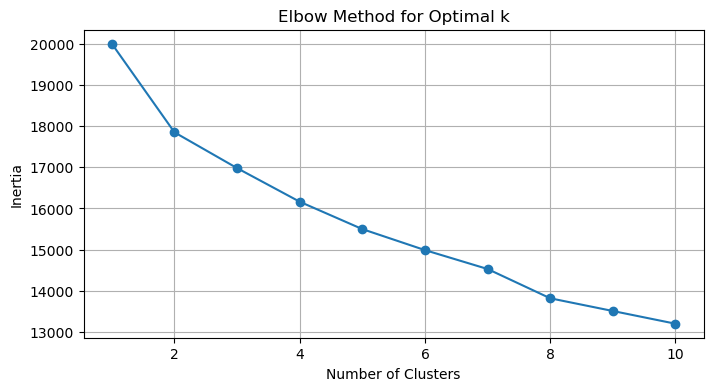

In [9]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_motives)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

## Step 9: Apply KMeans Clustering

In [10]:
optimal_k = 3  # You can change this based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_motives)

## Step 10: Visualize Clusters using PCA

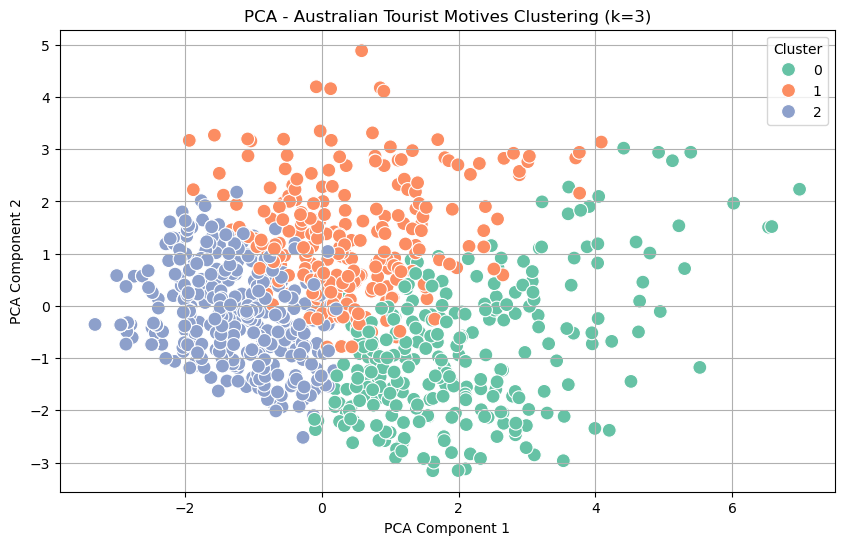

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=clusters, palette='Set2', s=100)
plt.title(f'PCA - Australian Tourist Motives Clustering (k={optimal_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


## Step 11: Add Cluster Labels to Original Dataset

In [12]:
df['Cluster'] = clusters
df.head()

,Gender,Age,Education,Income,Income2,Occupation,State,Relationship.Status,Obligation,Obligation2,...,not care about prices,life style of the local people,intense experience of nature,cosiness/familiar atmosphere,maintain unspoilt surroundings,everything organised,unspoilt nature/natural landscape,cultural offers,change of surroundings,Cluster
0,Female,25,6.0,"$30,001 to $60,000",30-60k,Clerical or service worker,VIC,single,4.800000,Q4,...,no,no,no,no,no,no,no,no,no,2
1,Female,31,8.0,"$120,001 to $150,000",>120k,professional,WA,married,3.300000,Q1,...,no,yes,no,no,no,no,no,no,yes,1
2,Male,21,3.0,"$90,001 to $120,000",90-120k,NaN,NSW,single,3.400000,Q2,...,yes,yes,no,yes,no,no,no,yes,no,2
3,Female,18,2.0,"$30,001 to $60,000",30-60k,unemployed,NSW,single,2.633333,Q1,...,no,no,yes,no,no,no,no,no,yes,1
4,Male,61,3.0,"Less than $30,000",<30k,retired,WA,married,3.400000,Q2,...,no,yes,no,no,yes,no,no,no,no,2


## Step 12: Profile Clusters using Demographics
# Choose a few demographic features

In [13]:
demographics = ['Gender', 'Age', 'Education', 'Income', 'Relationship.Status']
profile = df.groupby('Cluster')[demographics].agg(lambda x: x.value_counts().index[0])
profile

,Gender,Age,Education,Income,Relationship.Status
Cluster,,,,,
0,Female,39,7.0,"$30,001 to $60,000",married
1,Male,31,7.0,"$30,001 to $60,000",married
2,Male,55,7.0,"$30,001 to $60,000",married


## Step 13: Evaluate Cluster Quality

In [14]:
sil_score = silhouette_score(scaled_motives, clusters)
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.094


## Step 14: Save Final Clustered Data to CSV

In [15]:
df.to_csv("clustered_tourist_segments.csv", index=False)
print("Success!")

Success!
